Neural Nets using Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import ShuffleSplit


model = Sequential()

Using TensorFlow backend.


Adding Layers,Neurons

In [2]:
from keras.layers import Dense
from keras import optimizers



def neuralnet(batch,units,activfunction,epoch,X_train,y_train,X_test,y_test):
    model.add(Dense(units=units, activation=activfunction,input_dim=27))#input layer
    
    model.add(Dense(units=1, activation='sigmoid'))#output layer
    sgd=optimizers.SGD(learning_rate=0.0005, momentum=0.0, nesterov=False)
    model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=epoch, batch_size=batch,shuffle=True)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    loss_and_metrics=model.evaluate(X_test, y_test, batch_size=100)
    test_loss =loss_and_metrics[0]
    test_acc =loss_and_metrics[1]
    return train_acc, train_loss, test_acc, test_loss

In [3]:
def neuralnetm(batch,units,activfunction,epoch,X_train,y_train,X_test,y_test):
    model.add(Dense(units=units, activation=activfunction,input_dim=117))#input layer
    
    model.add(Dense(units=2, activation='sigmoid'))#output layer
    sgd=optimizers.SGD(learning_rate=0.0005, momentum=0.0, nesterov=False)
    model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])
    history=model.fit(X_train, y_train, epochs=epoch, batch_size=batch,shuffle=True)
    train_acc = history.history["accuracy"]
    train_loss = history.history["loss"]
    loss_and_metrics=model.evaluate(X_test, y_test, batch_size=100)
    test_loss =loss_and_metrics[0]
    test_acc =loss_and_metrics[1]
    return train_acc, train_loss, test_acc, test_loss

Energy dataset

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



data=pd.read_csv("energydata_complete.csv")
data=data.drop(['date'],axis=1)
data=(data-data.mean())/data.std()
y=data.Appliances

df=data.drop(['Appliances'],axis=1)
a=np.array([])
for i in range(len(y)):
    
    if y[i]>=(y.median(axis=0)):
        a=np.append(a,1)
    elif y[i]<(y.median(axis=0)):
        a=np.append(a,0)
df=df.assign(Class=a) 
y=df.Class

df=df.drop(['Class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15788, 27) (3947, 27) (15788,) (3947,)


Mushroom dataset

In [5]:
from sklearn.preprocessing import OneHotEncoder 
onehotencoder = OneHotEncoder() 
data_mushroom=pd.read_csv("mushrooms.csv")
y_mushroom=data_mushroom.target
y_mushroom=pd.DataFrame(y_mushroom)
df_mushroom=data_mushroom.drop(['target'],axis=1)
df_mushroom = onehotencoder.fit_transform(df_mushroom).toarray() 
y_mushroom = onehotencoder.fit_transform(y_mushroom).toarray()

X_trainm, X_testm, y_trainm, y_testm = train_test_split(df_mushroom, y_mushroom, test_size=0.2)


Energy data Evaluation

Epoch 1/50
15788/15788 [==============================] - 3s 186us/step - loss: 0.6913 - accuracy: 0.6234
Epoch 2/50
15788/15788 [==============================] - 1s 84us/step - loss: 0.6887 - accuracy: 0.6234
Epoch 3/50
15788/15788 [==============================] - 1s 88us/step - loss: 0.6864 - accuracy: 0.6234
Epoch 4/50
15788/15788 [==============================] - 2s 101us/step - loss: 0.6842 - accuracy: 0.6234
Epoch 5/50
15788/15788 [==============================] - 2s 100us/step - loss: 0.6823 - accuracy: 0.6234
Epoch 6/50
15788/15788 [==============================] - 1s 84us/step - loss: 0.6805 - accuracy: 0.6234
Epoch 7/50
15788/15788 [==============================] - 1s 83us/step - loss: 0.6789 - accuracy: 0.6234
Epoch 8/50
15788/15788 [==============================] - 1s 84us/step - loss: 0.6774 - accuracy: 0.6234
Epoch 9/50
15788/15788 [==============================] - 1s 86us/step - loss: 0.6761 - accuracy: 0.6234
Epoch 10/50
15788/15788 [===========================

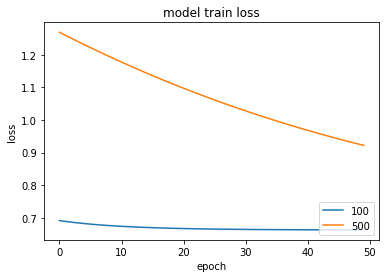

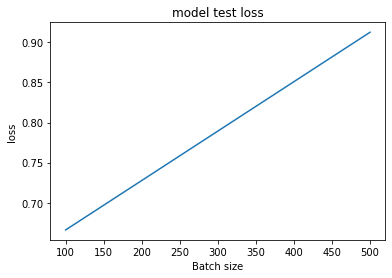

Epoch 1/50
15788/15788 [==============================] - 5s 317us/step - loss: 0.7209 - accuracy: 0.37661s - loss: 0.7
Epoch 2/50
15788/15788 [==============================] - 2s 143us/step - loss: 0.7165 - accuracy: 0.3766
Epoch 3/50
15788/15788 [==============================] - 2s 146us/step - loss: 0.7125 - accuracy: 0.3766
Epoch 4/50
15788/15788 [==============================] - 2s 143us/step - loss: 0.7088 - accuracy: 0.3766
Epoch 5/50
15788/15788 [==============================] - 3s 159us/step - loss: 0.7054 - accuracy: 0.3766
Epoch 6/50
15788/15788 [==============================] - 3s 161us/step - loss: 0.7022 - accuracy: 0.3766
Epoch 7/50
15788/15788 [==============================] - 3s 159us/step - loss: 0.6992 - accuracy: 0.3766
Epoch 8/50
15788/15788 [==============================] - 3s 161us/step - loss: 0.6965 - accuracy: 0.3766
Epoch 9/50
15788/15788 [==============================] - 3s 164us/step - loss: 0.6940 - accuracy: 0.4146
Epoch 10/50
15788/15788 [=======

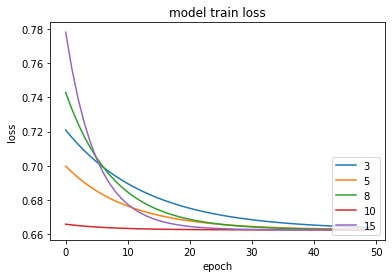

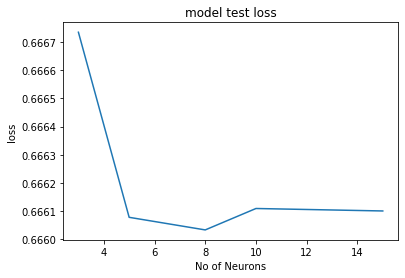

Epoch 1/50
15788/15788 [==============================] - 5s 326us/step - loss: 0.8564 - accuracy: 0.3766
Epoch 2/50
15788/15788 [==============================] - 2s 156us/step - loss: 0.8384 - accuracy: 0.3766
Epoch 3/50
15788/15788 [==============================] - 2s 147us/step - loss: 0.8219 - accuracy: 0.3766
Epoch 4/50
15788/15788 [==============================] - 2s 147us/step - loss: 0.8069 - accuracy: 0.3766
Epoch 5/50
15788/15788 [==============================] - 3s 164us/step - loss: 0.7932 - accuracy: 0.3766
Epoch 6/50
15788/15788 [==============================] - 3s 166us/step - loss: 0.7809 - accuracy: 0.3766
Epoch 7/50
15788/15788 [==============================] - 3s 164us/step - loss: 0.7696 - accuracy: 0.3766
Epoch 8/50
15788/15788 [==============================] - 3s 166us/step - loss: 0.7594 - accuracy: 0.3766
Epoch 9/50
15788/15788 [==============================] - 3s 161us/step - loss: 0.7502 - accuracy: 0.3766
Epoch 10/50
15788/15788 [=====================

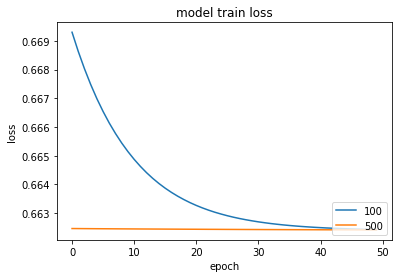

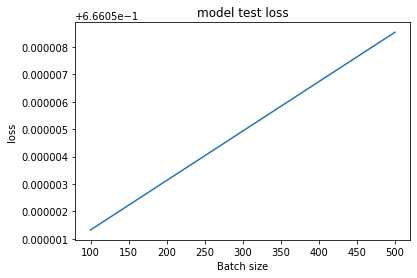

Epoch 1/50
15788/15788 [==============================] - ETA: 0s - loss: 0.7010 - accuracy: 0.37 - 3s 202us/step - loss: 0.7009 - accuracy: 0.3766
Epoch 2/50
15788/15788 [==============================] - 2s 100us/step - loss: 0.6992 - accuracy: 0.3766
Epoch 3/50
15788/15788 [==============================] - 2s 103us/step - loss: 0.6976 - accuracy: 0.3766
Epoch 4/50
15788/15788 [==============================] - 2s 109us/step - loss: 0.6960 - accuracy: 0.3766
Epoch 5/50
15788/15788 [==============================] - 2s 108us/step - loss: 0.6946 - accuracy: 0.3766
Epoch 6/50
15788/15788 [==============================] - 2s 107us/step - loss: 0.6931 - accuracy: 0.5011
Epoch 7/50
15788/15788 [==============================] - 2s 105us/step - loss: 0.6918 - accuracy: 0.6234
Epoch 8/50
15788/15788 [==============================] - 2s 104us/step - loss: 0.6905 - accuracy: 0.6234
Epoch 9/50
15788/15788 [==============================] - 2s 113us/step - loss: 0.6893 - accuracy: 0.6234
Epoc

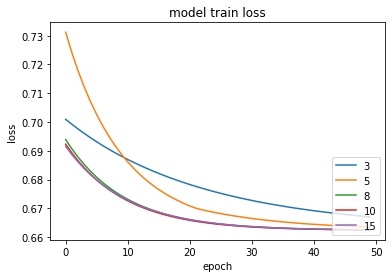

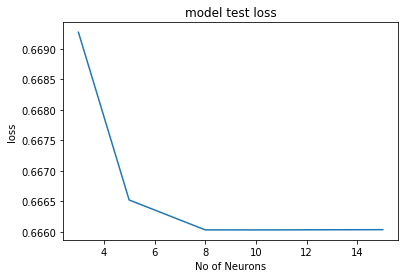

Epoch 1/50
15788/15788 [==============================] - 4s 230us/step - loss: 0.6860 - accuracy: 0.6234
Epoch 2/50
15788/15788 [==============================] - 2s 126us/step - loss: 0.6843 - accuracy: 0.6234
Epoch 3/50
15788/15788 [==============================] - 2s 126us/step - loss: 0.6828 - accuracy: 0.6234
Epoch 4/50
15788/15788 [==============================] - 2s 125us/step - loss: 0.6813 - accuracy: 0.6234
Epoch 5/50
15788/15788 [==============================] - 2s 131us/step - loss: 0.6800 - accuracy: 0.62341s - loss: 0.6
Epoch 6/50
15788/15788 [==============================] - 2s 131us/step - loss: 0.6788 - accuracy: 0.62340s - loss: 0.678
Epoch 7/50
15788/15788 [==============================] - 2s 125us/step - loss: 0.6776 - accuracy: 0.62340s - loss:
Epoch 8/50
15788/15788 [==============================] - 2s 125us/step - loss: 0.6765 - accuracy: 0.6234
Epoch 9/50
15788/15788 [==============================] - 2s 130us/step - loss: 0.6755 - accuracy: 0.6234
Epoch 

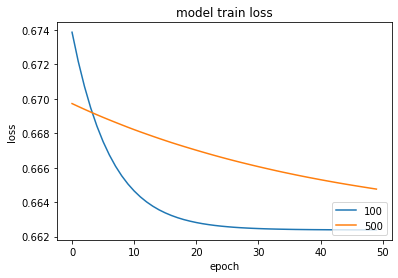

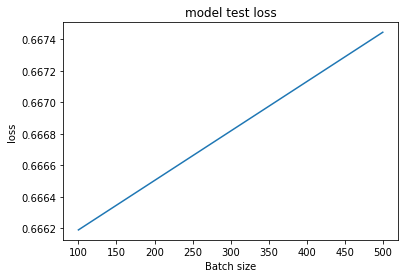

Epoch 1/50
15788/15788 [==============================] - 4s 261us/step - loss: 0.6627 - accuracy: 0.6234
Epoch 2/50
15788/15788 [==============================] - 2s 149us/step - loss: 0.6627 - accuracy: 0.6234
Epoch 3/50
15788/15788 [==============================] - 2s 137us/step - loss: 0.6626 - accuracy: 0.6234
Epoch 4/50
15788/15788 [==============================] - 2s 138us/step - loss: 0.6626 - accuracy: 0.6234
Epoch 5/50
15788/15788 [==============================] - 2s 148us/step - loss: 0.6626 - accuracy: 0.6234
Epoch 6/50
15788/15788 [==============================] - 2s 148us/step - loss: 0.6625 - accuracy: 0.6234
Epoch 7/50
15788/15788 [==============================] - 2s 138us/step - loss: 0.6625 - accuracy: 0.6234
Epoch 8/50
15788/15788 [==============================] - 2s 139us/step - loss: 0.6625 - accuracy: 0.6234
Epoch 9/50
15788/15788 [==============================] - 2s 152us/step - loss: 0.6625 - accuracy: 0.6234
Epoch 10/50
15788/15788 [=====================

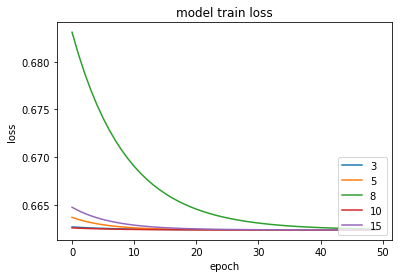

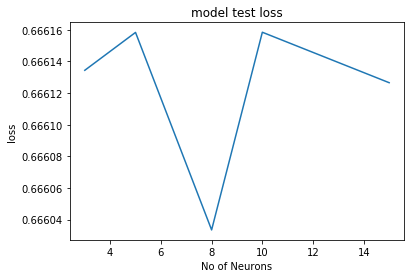

Epoch 1/50
15788/15788 [==============================] - 5s 291us/step - loss: 0.7288 - accuracy: 0.3766
Epoch 2/50
15788/15788 [==============================] - 3s 164us/step - loss: 0.7224 - accuracy: 0.37660s - loss: 0.7231 
Epoch 3/50
15788/15788 [==============================] - 3s 168us/step - loss: 0.7165 - accuracy: 0.3766
Epoch 4/50
15788/15788 [==============================] - 3s 172us/step - loss: 0.7113 - accuracy: 0.3766
Epoch 5/50
15788/15788 [==============================] - 3s 165us/step - loss: 0.7066 - accuracy: 0.3766
Epoch 6/50
15788/15788 [==============================] - 3s 163us/step - loss: 0.7023 - accuracy: 0.3766
Epoch 7/50
15788/15788 [==============================] - 3s 164us/step - loss: 0.6985 - accuracy: 0.37660s - loss: 0.698
Epoch 8/50
15788/15788 [==============================] - 3s 163us/step - loss: 0.6951 - accuracy: 0.3766
Epoch 9/50
15788/15788 [==============================] - 3s 166us/step - loss: 0.6920 - accuracy: 0.5980
Epoch 10/50


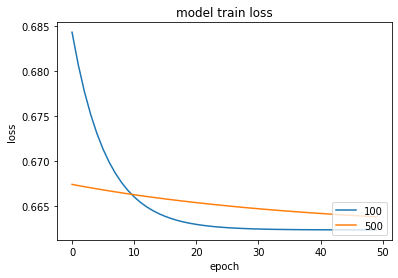

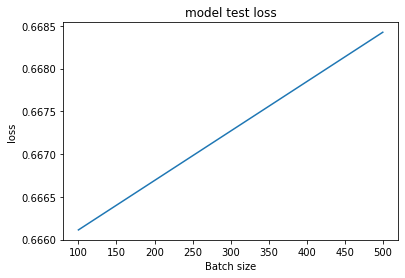

Epoch 1/50
15788/15788 [==============================] - 11s 707us/step - loss: 0.8013 - accuracy: 0.3766
Epoch 2/50
15788/15788 [==============================] - 7s 441us/step - loss: 0.7830 - accuracy: 0.3766
Epoch 3/50
15788/15788 [==============================] - 7s 451us/step - loss: 0.7673 - accuracy: 0.3766
Epoch 4/50
15788/15788 [==============================] - 7s 414us/step - loss: 0.7538 - accuracy: 0.3766
Epoch 5/50
15788/15788 [==============================] - 7s 425us/step - loss: 0.7422 - accuracy: 0.3766
Epoch 6/50
15788/15788 [==============================] - 7s 414us/step - loss: 0.7322 - accuracy: 0.3766
Epoch 7/50
15788/15788 [==============================] - 7s 424us/step - loss: 0.7235 - accuracy: 0.3766
Epoch 8/50
15788/15788 [==============================] - 7s 431us/step - loss: 0.7160 - accuracy: 0.3766
Epoch 9/50
15788/15788 [==============================] - 7s 424us/step - loss: 0.7095 - accuracy: 0.3766
Epoch 10/50
15788/15788 [====================

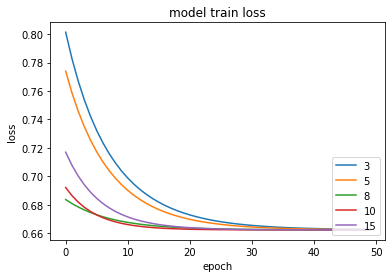

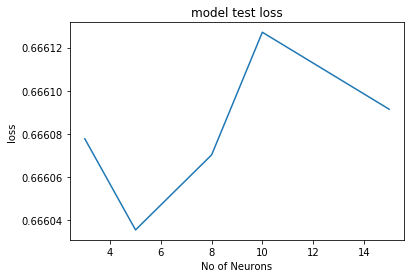

Epoch 1/50
15788/15788 [==============================] - 7s 468us/step - loss: 0.6630 - accuracy: 0.6234
Epoch 2/50
15788/15788 [==============================] - 5s 339us/step - loss: 0.6629 - accuracy: 0.6234
Epoch 3/50
15788/15788 [==============================] - 5s 315us/step - loss: 0.6628 - accuracy: 0.6234
Epoch 4/50
15788/15788 [==============================] - 5s 315us/step - loss: 0.6628 - accuracy: 0.6234
Epoch 5/50
15788/15788 [==============================] - 5s 328us/step - loss: 0.6627 - accuracy: 0.6234
Epoch 6/50
15788/15788 [==============================] - 5s 320us/step - loss: 0.6626 - accuracy: 0.6234
Epoch 7/50
15788/15788 [==============================] - 5s 318us/step - loss: 0.6626 - accuracy: 0.6234
Epoch 8/50
15788/15788 [==============================] - 5s 334us/step - loss: 0.6626 - accuracy: 0.6234
Epoch 9/50
15788/15788 [==============================] - 5s 318us/step - loss: 0.6625 - accuracy: 0.6234
Epoch 10/50
15788/15788 [=====================

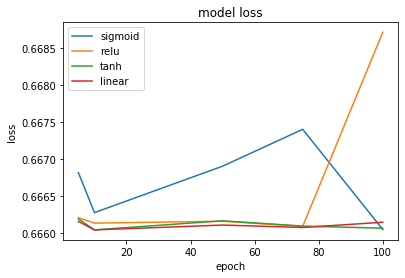

In [16]:



units_list = [3,5,8,10,15]
act_list = ['sigmoid','relu','tanh','linear']
epoch_list = [5,10,50,75,100]
batches=[100,500]

trainl = []
traina = []
testl = []
testa = []

test_act = []
test_los = []

for act in act_list:
    trainl = []
    traina = []
    testl = []
    testa = []
    
    for batch in batches:
        train_acc, train_loss, test_acc, test_loss = neuralnet(batch,5,act,50,X_train,y_train,X_test,y_test)
        trainl.append(train_loss)
        traina.append(train_acc)
        testl.append(test_loss)
        testa.append(test_acc)
        
    
    
    plt.title('model train loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    for i in range(len(batches)):
        plt.plot(trainl[i])
        
    plt.legend(batches, loc='lower right')
    plt.show()
    
    plt.title('model test loss')
    plt.ylabel('loss')
    plt.xlabel('Batch size')
    plt.plot(batches,testl)
    plt.show()           
    trainl = []
    traina = []
    testl = []
    testa = []
    
    
    
    for units  in units_list:
        train_acc, train_loss, test_acc, test_loss = neuralnet(100,units,act,50,X_train,y_train,X_test,y_test)
        trainl.append(train_loss)
        traina.append(train_acc)
        testl.append(test_loss)
        testa.append(test_acc)
    plt.title('model train loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    for i in range(len(units_list)):
        plt.plot(trainl[i])
        
    plt.legend(units_list, loc='lower right')
    plt.show()
    
    plt.title('model test loss')
    plt.ylabel('loss')
    plt.xlabel('No of Neurons')
    plt.plot(units_list,testl)
    plt.show()  
    
    trainl = []
    traina = []
    testl = []
    testa = []


    for epo  in epoch_list:
        train_acc, train_loss, test_acc, test_loss = neuralnet(100,5,act,50,X_train,y_train,X_test,y_test)
        testa.append(test_acc)
        testl.append(test_loss)
    test_act.append(testa)
    test_los.append(testl)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for i in range(4):
    plt.plot(epoch_list,test_los[i])

    
plt.legend(['sigmoid', 'relu', 'tanh', 'linear'], loc='upper left')
plt.show()         
trainl = []
traina = []
testl = []
testa = []
    
    
    
    
    







In [ ]:
Mushroom data evaluation

Epoch 1/10
6499/6499 [==============================] - 0s 27us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 13us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 14us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 14us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 14us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 14us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 13us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 17us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 13us/step - loss: 0.6925 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 18us/step
Epo

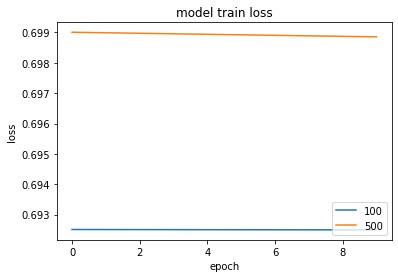

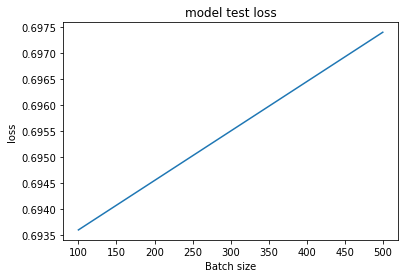

Epoch 1/10
6499/6499 [==============================] - 0s 32us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 13us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 14us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 13us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 13us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 16us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 16us/step - loss: 0.6931 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 16us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 16us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 23us/step
Epo

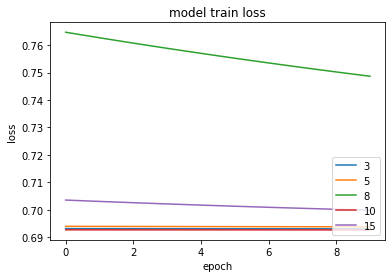

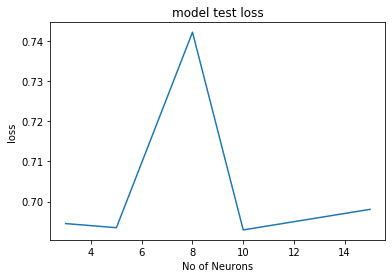

Epoch 1/10
6499/6499 [==============================] - 0s 55us/step - loss: 0.7094 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 19us/step - loss: 0.7091 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 19us/step - loss: 0.7088 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 18us/step - loss: 0.7085 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 18us/step - loss: 0.7082 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 21us/step - loss: 0.7079 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 24us/step - loss: 0.7076 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 19us/step - loss: 0.7074 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 17us/step - loss: 0.7071 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 30us/step
Epo

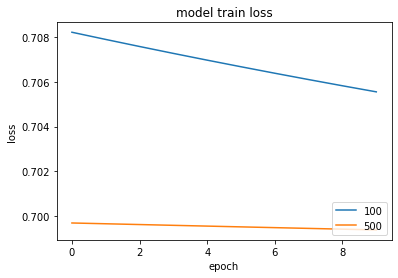

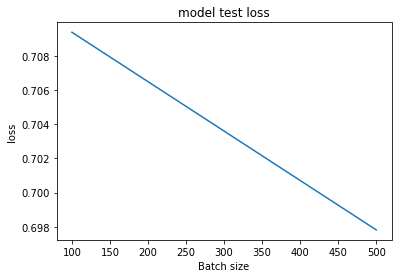

Epoch 1/10
6499/6499 [==============================] - 0s 72us/step - loss: 0.6951 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 23us/step - loss: 0.6950 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 22us/step - loss: 0.6949 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 23us/step - loss: 0.6948 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 22us/step - loss: 0.6947 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 22us/step - loss: 0.6946 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 22us/step - loss: 0.6945 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 23us/step - loss: 0.6944 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 23us/step - loss: 0.6943 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 51us/step
Epo

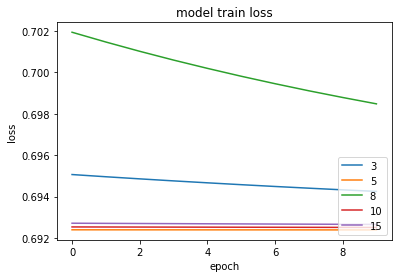

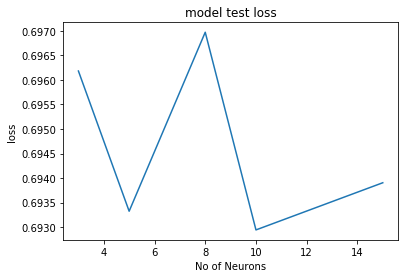

Epoch 1/10
6499/6499 [==============================] - 1s 129us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 29us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 30us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 28us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 29us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 29us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 28us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 28us/step - loss: 0.6929 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 30us/step - loss: 0.6929 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 59us/step
Ep

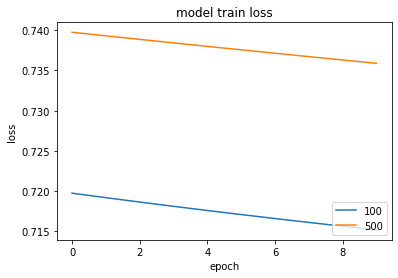

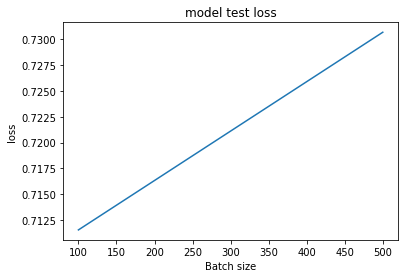

Epoch 1/10
6499/6499 [==============================] - 1s 125us/step - loss: 0.6976 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 35us/step - loss: 0.6975 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 38us/step - loss: 0.6974 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 38us/step - loss: 0.6973 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 38us/step - loss: 0.6972 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 38us/step - loss: 0.6971 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 38us/step - loss: 0.6970 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 37us/step - loss: 0.6970 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 37us/step - loss: 0.6969 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 67us/step
Ep

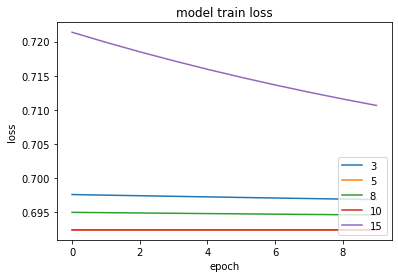

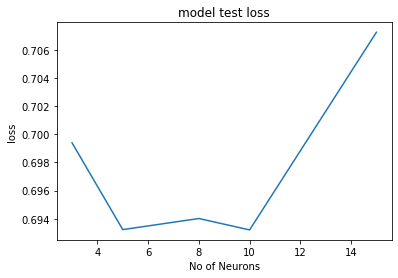

Epoch 1/10
6499/6499 [==============================] - 1s 138us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 39us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 40us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 40us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 39us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 39us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 39us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 39us/step - loss: 0.6930 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 39us/step - loss: 0.6929 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 73us/step
Ep

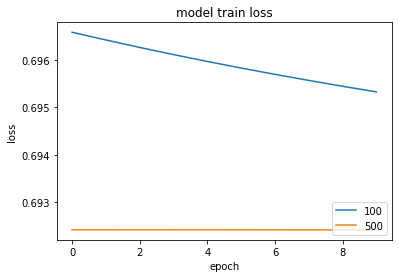

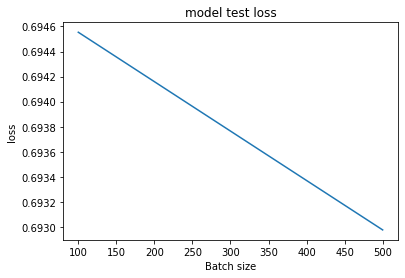

Epoch 1/10
6499/6499 [==============================] - 1s 167us/step - loss: 0.6929 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 47us/step - loss: 0.6929 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 52us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 53us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 52us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 53us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 53us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 52us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 53us/step - loss: 0.6928 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 89us/step
Ep

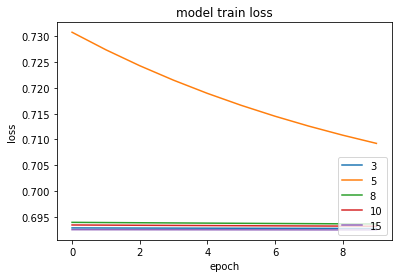

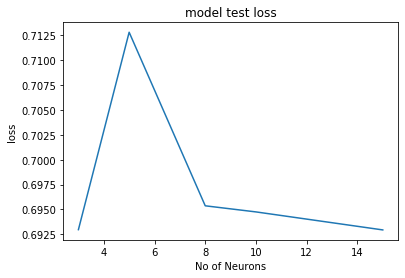

Epoch 1/10
6499/6499 [==============================] - 1s 208us/step - loss: 0.6962 - accuracy: 0.5199
Epoch 2/10
6499/6499 [==============================] - 0s 71us/step - loss: 0.6960 - accuracy: 0.5199
Epoch 3/10
6499/6499 [==============================] - 0s 67us/step - loss: 0.6959 - accuracy: 0.5199
Epoch 4/10
6499/6499 [==============================] - 0s 62us/step - loss: 0.6957 - accuracy: 0.5199
Epoch 5/10
6499/6499 [==============================] - 0s 60us/step - loss: 0.6956 - accuracy: 0.5199
Epoch 6/10
6499/6499 [==============================] - 0s 62us/step - loss: 0.6955 - accuracy: 0.5199
Epoch 7/10
6499/6499 [==============================] - 0s 57us/step - loss: 0.6954 - accuracy: 0.5199
Epoch 8/10
6499/6499 [==============================] - 0s 59us/step - loss: 0.6952 - accuracy: 0.5199
Epoch 9/10
6499/6499 [==============================] - 0s 57us/step - loss: 0.6951 - accuracy: 0.5199
Epoch 10/10
1625/1625 [==============================] - 0s 110us/step
E

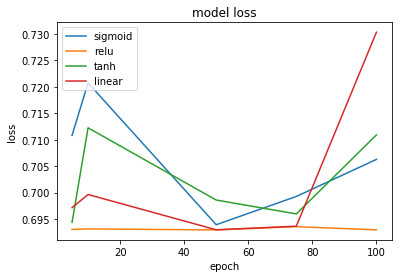

In [9]:
units_list = [3,5,8,10,15]x
act_list = ['sigmoid','relu','tanh','linear']
epoch_list = [5,10,50,75,100]
batches=[100,500]


trainl = []
traina = []
testl = []
testa = []

test_act = []
test_los = []

for act in act_list:
    trainl = []
    traina = []
    testl = []
    testa = []
    for batch in batches:
        train_acc, train_loss, test_acc, test_loss = neuralnetm(batch,5,act,10,X_trainm,y_trainm,X_testm,y_testm)
        trainl.append(train_loss)
        traina.append(train_acc)
        testl.append(test_loss)
        testa.append(test_acc)
        
    
    
    plt.title('model train loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    for i in range(len(batches)):
        plt.plot(trainl[i])
        
    plt.legend(batches, loc='lower right')
    plt.show()
    
    plt.title('model test loss')
    plt.ylabel('loss')
    plt.xlabel('Batch size')
    plt.plot(batches,testl)
    plt.show()           
    trainl = []
    traina = []
    testl = []
    testa = []
    
    
    
    for units  in units_list:
        train_acc, train_loss, test_acc, test_loss = neuralnetm(100,units,act,10,X_trainm,y_trainm,X_testm,y_testm)
        trainl.append(train_loss)
        traina.append(train_acc)
        testl.append(test_loss)
        testa.append(test_acc)
    plt.title('model train loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    for i in range(len(units_list)):
        plt.plot(trainl[i])
        
    plt.legend(units_list, loc='lower right')
    plt.show()
    
    plt.title('model test loss')
    plt.ylabel('loss')
    plt.xlabel('No of Neurons')
    plt.plot(units_list,testl)
    plt.show()  
    testa=[]    
    testl=[]
    trainl = []
    traina = []
    

    for epo  in epoch_list:
        train_acc, train_loss, test_acc, test_loss = neuralnetm(100,5,act,10,X_trainm,y_trainm,X_testm,y_testm)
        testa.append(test_acc)
        testl.append(test_loss)
    test_act.append(testa)
    test_los.append(testl)

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
for i in range(4):
  plt.plot(epoch_list,test_los[i])
   
    
plt.legend(['sigmoid', 'relu', 'tanh', 'linear'], loc='upper left')
plt.show()         
testa=[]    
testl=[]
trainl = []
traina = []
    

Energy Data Set

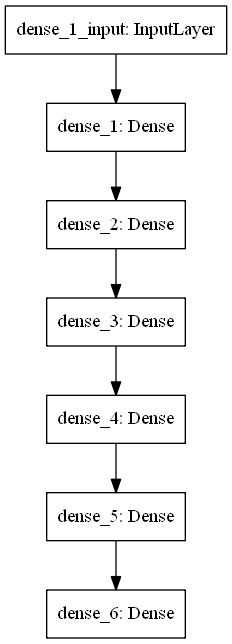

In [6]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

In [ ]:
Grid search energy dataset

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import ShuffleSplit



def create_model(neurons=4,activation='relu', dropout_rate=0.0, optimizer='adam'):
    # default values
    #activation='relu' # or linear
    #dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    #optimizer='adam' # or SGD
    lr = 0.01
    #momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(units=neurons, 
                    input_dim=27, 
                    activation=activation,
                    ))
   
    model.add(Dense(1,  activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=100, epochs=10) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid'] # softmax, softplus, softsign 
#dropout_rate = [0.0,  0.2, 0.4,  0.6,  0.8]
#weight_constraint=[1, 2, 3, 4, 5]
neurons = [ 5, 10, 15]

optimizer = [ 'SGD', 'Adam']
##############################################################
# grid search epochs, batch size
epochs = [10,50,100] # add 50, 100, 150 etc
batch_size = [100,500] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size, neurons = neurons, activation=activation)
cv = ShuffleSplit(test_size=0.02, n_splits=1)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_result = grid.fit(df, y) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

Epoch 1/100
19735/19735 [==============================] - 0s 17us/step - loss: 0.5823 - accuracy: 0.6956
Epoch 2/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.5372 - accuracy: 0.7284
Epoch 3/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.5221 - accuracy: 0.7337
Epoch 4/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.5132 - accuracy: 0.7371
Epoch 5/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.5071 - accuracy: 0.7393 0s - loss: 0.5111 - accuracy: 
Epoch 6/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.5022 - accuracy: 0.7418
Epoch 7/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.4972 - accuracy: 0.7435
Epoch 8/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.4930 - accuracy: 0.7446
Epoch 9/100
19735/19735 [==============================] - 0s 10us/step - loss: 0.4894 - accuracy: 0.7473
Epoch 10/100
19

In [ ]:
Grid search Mushroom dataset

In [11]:



def create_model(neurons=4,activation='relu', dropout_rate=0.0, optimizer='adam'):
    # default values
    #activation='relu' # or linear
    #dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    #optimizer='adam' # or SGD
    lr = 0.01
    #momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(units=neurons, 
                    input_dim=117, 
                    activation=activation,
                    ))
   
    model.add(Dense(2,  activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=100, epochs=10) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid'] # softmax, softplus, softsign 
#dropout_rate = [0.0,  0.2, 0.4,  0.6,  0.8]
#weight_constraint=[1, 2, 3, 4, 5]
neurons = [ 5, 10, 15]

optimizer = [ 'SGD', 'Adam']
##############################################################
# grid search epochs, batch size
epochs = [10,50,100] # add 50, 100, 150 etc
batch_size = [100,500] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size, neurons = neurons, activation=activation)
cv = ShuffleSplit(test_size=0.02, n_splits=1)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv)
grid_result = grid.fit(df_mushroom, y_mushroom) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

C:\Users\rahul\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/10
8124/8124 [==============================] - 0s 21us/step - loss: 0.5936 - accuracy: 0.6793
Epoch 2/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.3090 - accuracy: 0.9122
Epoch 3/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.1742 - accuracy: 0.9431
Epoch 4/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.1095 - accuracy: 0.9732
Epoch 5/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.0753 - accuracy: 0.9846
Epoch 6/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.0550 - accuracy: 0.9902
Epoch 7/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.0421 - accuracy: 0.9933
Epoch 8/10
8124/8124 [==============================] - 0s 12us/step - loss: 0.0329 - accuracy: 0.9958
Epoch 9/10
8124/8124 [==============================] - 0s 15us/step - loss: 0.0264 - accuracy: 0.9977
Epoch 10/10
8124/8124 [==============================] - 0s 15us/step - l

In [ ]:
Grid searchCV energy data set

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import SGD
from keras.constraints import maxnorm
from sklearn.model_selection import ShuffleSplit



def create_model(neurons=4,activation='relu', dropout_rate=0.0, optimizer='adam'):
    # default values
    #activation='relu' # or linear
    #dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    #optimizer='adam' # or SGD
    lr = 0.01
    #momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(units=neurons, 
                    input_dim=27, 
                    activation=activation,
                    ))
   
    model.add(Dense(1,  activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=100, epochs=10) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid'] # softmax, softplus, softsign 
#dropout_rate = [0.0,  0.2, 0.4,  0.6,  0.8]
#weight_constraint=[1, 2, 3, 4, 5]
neurons = [ 5, 10, 15]

optimizer = [ 'SGD', 'Adam']
##############################################################
# grid search epochs, batch size
epochs = [10,50,100] # add 50, 100, 150 etc
batch_size = [100,500] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size, neurons = neurons, activation=activation)
#cv = ShuffleSplit(test_size=0.01, n_splits=1)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(df, y) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

C:\Users\rahul\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Epoch 1/50
19735/19735 [==============================] - 0s 17us/step - loss: 0.8027 - accuracy: 0.4038
Epoch 2/50
19735/19735 [==============================] - 0s 11us/step - loss: 0.6624 - accuracy: 0.6001
Epoch 3/50
19735/19735 [==============================] - 0s 13us/step - loss: 0.6048 - accuracy: 0.7132
Epoch 4/50
19735/19735 [==============================] - 0s 10us/step - loss: 0.5789 - accuracy: 0.7263
Epoch 5/50
19735/19735 [==============================] - 0s 12us/step - loss: 0.5625 - accuracy: 0.7275
Epoch 6/50
19735/19735 [==============================] - 0s 12us/step - loss: 0.5505 - accuracy: 0.7311
Epoch 7/50
19735/19735 [==============================] - 0s 12us/step - loss: 0.5415 - accuracy: 0.7329
Epoch 8/50
19735/19735 [==============================] - 0s 12us/step - loss: 0.5349 - accuracy: 0.7367
Epoch 9/50
19735/19735 [==============================] - 0s 13us/step - loss: 0.5298 - accuracy: 0.7365
Epoch 10/50
19735/19735 [==============================

In [ ]:
Grid search CV with mushrrom dataset

In [11]:



def create_model(neurons=4,activation='relu', dropout_rate=0.0, optimizer='adam'):
    # default values
    #activation='relu' # or linear
    #dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    #optimizer='adam' # or SGD
    lr = 0.01
    #momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(units=neurons, 
                    input_dim=117, 
                    activation=activation,
                    ))
   
    model.add(Dense(2,  activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=100, epochs=10) 
# use verbose=0 if you do not want to see progress

########################################################
# Use scikit-learn to grid search 
activation =  ['relu', 'tanh', 'sigmoid'] # softmax, softplus, softsign 
#dropout_rate = [0.0,  0.2, 0.4,  0.6,  0.8]
#weight_constraint=[1, 2, 3, 4, 5]
neurons = [ 5, 10, 15]

optimizer = [ 'SGD', 'Adam']
##############################################################
# grid search epochs, batch size
epochs = [10,50,100] # add 50, 100, 150 etc
batch_size = [100,500] # add 5, 10, 20, 40, 60, 80, 100 etc
param_grid = dict(epochs=epochs, batch_size=batch_size, neurons = neurons, activation=activation)
#cv = ShuffleSplit(test_size=0.01, n_splits=1)
##############################################################
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(df_mushroom, y_mushroom) 
##############################################################
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
##############################################################

Epoch 1/100
8124/8124 [==============================] - 0s 25us/step - loss: 0.5524 - accuracy: 0.7792
Epoch 2/100
8124/8124 [==============================] - 0s 11us/step - loss: 0.2394 - accuracy: 0.9522
Epoch 3/100
8124/8124 [==============================] - 0s 13us/step - loss: 0.1179 - accuracy: 0.9788
Epoch 4/100
8124/8124 [==============================] - 0s 12us/step - loss: 0.0731 - accuracy: 0.9866
Epoch 5/100
8124/8124 [==============================] - 0s 12us/step - loss: 0.0502 - accuracy: 0.9916
Epoch 6/100
8124/8124 [==============================] - 0s 13us/step - loss: 0.0368 - accuracy: 0.9946
Epoch 7/100
8124/8124 [==============================] - 0s 12us/step - loss: 0.0278 - accuracy: 0.9972
Epoch 8/100
8124/8124 [==============================] - 0s 14us/step - loss: 0.0215 - accuracy: 0.9979
Epoch 9/100
8124/8124 [==============================] - 0s 16us/step - loss: 0.0169 - accuracy: 0.9985
Epoch 10/100
8124/8124 [==============================] - 0s 15u

Metrics

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import time
def create_model(neurons=5,activation='sigmoid', dropout_rate=0.0, optimizer='adam'):
    # default values
    #activation='relu' # or linear
    #dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    #optimizer='adam' # or SGD
    lr = 0.01
    #momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(units=neurons, 
                    input_dim=27, 
                    activation=activation,
                    ))
   
    model.add(Dense(1,  activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=100, epochs=50) 
t1=time.time()
model.fit(X_train,y_train)
train_timet=round(time.time()-t1,3)
print(train_timet)
y_pred=model.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Epoch 1/50
15788/15788 [==============================] - 0s 27us/step - loss: 0.9061 - accuracy: 0.3797
Epoch 2/50
15788/15788 [==============================] - 0s 17us/step - loss: 0.7333 - accuracy: 0.4672
Epoch 3/50
15788/15788 [==============================] - 0s 17us/step - loss: 0.6511 - accuracy: 0.6338
Epoch 4/50
15788/15788 [==============================] - 0s 17us/step - loss: 0.6129 - accuracy: 0.7003
Epoch 5/50
15788/15788 [==============================] - 0s 19us/step - loss: 0.5928 - accuracy: 0.7156
Epoch 6/50
15788/15788 [==============================] - 0s 18us/step - loss: 0.5796 - accuracy: 0.7204
Epoch 7/50
15788/15788 [==============================] - 0s 18us/step - loss: 0.5689 - accuracy: 0.7243
Epoch 8/50
15788/15788 [==============================] - 0s 19us/step - loss: 0.5598 - accuracy: 0.7284
Epoch 9/50
15788/15788 [==============================] - 0s 18us/step - loss: 0.5521 - accuracy: 0.7287
Epoch 10/50
15788/15788 [==============================

In [13]:

def create_model1(neurons=5,activation='relu', dropout_rate=0.0, optimizer='adam'):
    # default values
    #activation='relu' # or linear
    #dropout_rate=0.0 # or 0.2
    init_mode='uniform'
    weight_constraint=0 # or  4
    #optimizer='adam' # or SGD
    lr = 0.01
    #momemntum=0
    # create model
    model = Sequential()
    model.add(Dense(units=10, 
                    input_dim=117, 
                    activation=activation,
                    ))
   
    model.add(Dense(2,  activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', 
                  optimizer=optimizer, 
                  metrics=['accuracy'])
    return model

# create model
model1 = KerasClassifier(build_fn=create_model1, batch_size=100, epochs=100) 
model1.fit(X_trainm,y_trainm)
y_pred=model1.predict(X_testm)

print(confusion_matrix(y_testm[:,1],y_pred))
print(classification_report(y_testm[:,1],y_pred))

Epoch 1/100
6499/6499 [==============================] - 0s 23us/step - loss: 0.4617 - accuracy: 0.8271
Epoch 2/100
6499/6499 [==============================] - 0s 12us/step - loss: 0.2225 - accuracy: 0.9397
Epoch 3/100
6499/6499 [==============================] - 0s 13us/step - loss: 0.1271 - accuracy: 0.9747
Epoch 4/100
6499/6499 [==============================] - 0s 12us/step - loss: 0.0796 - accuracy: 0.9868
Epoch 5/100
6499/6499 [==============================] - 0s 13us/step - loss: 0.0536 - accuracy: 0.9932
Epoch 6/100
6499/6499 [==============================] - 0s 12us/step - loss: 0.0383 - accuracy: 0.9967
Epoch 7/100
6499/6499 [==============================] - 0s 13us/step - loss: 0.0288 - accuracy: 0.9982
Epoch 8/100
6499/6499 [==============================] - 0s 13us/step - loss: 0.0223 - accuracy: 0.9989
Epoch 9/100
6499/6499 [==============================] - 0s 13us/step - loss: 0.0179 - accuracy: 0.9991
Epoch 10/100
6499/6499 [==============================] - 0s 12u

Roc curve

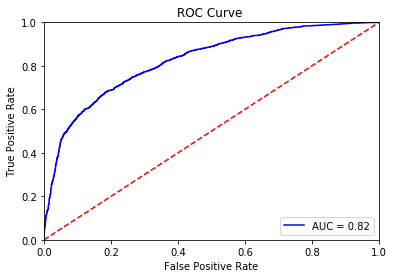

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = model.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()

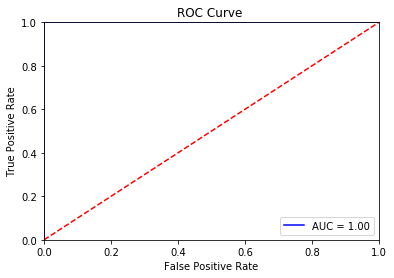

In [24]:
y_scores = model1.predict(X_testm)

fpr, tpr, threshold = roc_curve(y_testm[:,1], y_scores)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve ')
plt.show()